<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

---
* The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.
---

In [1]:
# Import dataset from tensorflow
from tensorflow.keras.datasets import boston_housing

# Load the Data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


---
* Normalize the data (all features should have roughly the same scale)
---

In [2]:
# We'll normalize the data using the min-max scaler we used in the assignment the other night
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
* Import the type of model and layers that you will need from Keras.
* Instantiate a model object and use model.add() to add layers to your model
* Since this is a regression model you will have a single output node in the final layer.
* Use activation functions that are appropriate for this task
* Compile your model
* Fit your model and report its accuracy in terms of Mean Squared Error
---

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import History 

# Instantiate history for callback/visualizations
history = History()

# Instantiate model and add layers
model = Sequential()
model.add(Dense(128, input_dim=13, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model 
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

# Fit the model and report MSE
model.fit(x=X_train, 
        y=y_train, 
        epochs=50, 
        validation_data=(X_test, y_test), 
        callbacks=[history])

Epoch 1/50
13/13 [==============================] - 0s 15ms/step - loss: 21.6662 - mse: 555.7148 - val_loss: 21.4566 - val_mse: 546.9943
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 19.7934 - mse: 481.2976 - val_loss: 18.8486 - val_mse: 447.6584
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 16.2342 - mse: 358.3627 - val_loss: 14.2736 - val_mse: 288.4119
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 11.1483 - mse: 201.7037 - val_loss: 9.6315 - val_mse: 152.1716
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 8.9867 - mse: 132.3321 - val_loss: 8.5558 - val_mse: 126.7394
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 7.9088 - mse: 108.5652 - val_loss: 7.5904 - val_mse: 104.5258
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 6.8180 - mse: 90.3144 - val_loss: 6.7676 - val_mse: 87.3549
Epoch 8/50
13/13 [==============================] - 0s 2

---
* Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.
---

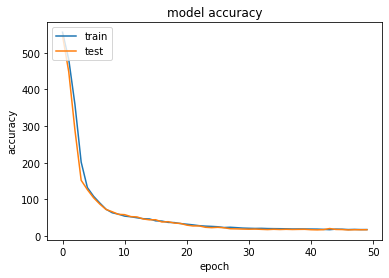

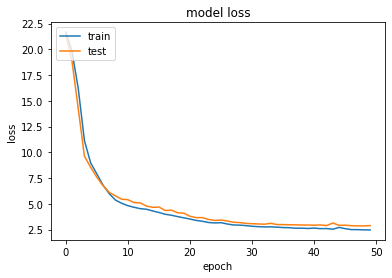

In [4]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---
* Run this same data through a linear regression model. Which achieves higher accuracy?
---

In [5]:
# Imports for baseline regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate linear regression model 
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Train error:", mse)

Train error: 22.00480083834814


In [6]:
# Also apply model to test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test error:", mse)

Test error: 23.19559925642294


---
Our model had a lower MSE than the baseline, which is an improvement, making our model more accurate. 

---

---
* Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
---

In [7]:
X_train

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [8]:
# Alright, we need to set up a df with these arrays
import pandas as pd

# Set column names given in dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Instantiate dfs
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Fingers crossed
X_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512


In [9]:
# Not gonna lie, from the numbers idk if I've succeeded here or not 
# Lets get rid of some features and see if we can lower our mse 
X_train_df = X_train_df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX']]

# What we do train, we must do to test 
X_test_df = X_test_df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX']]

---
* After feature engineering, which model sees a greater accuracy boost due to the new features?
---

In [10]:
# Instantiate history for callback/visualizations
history2 = History()

# Instantiate model and add layers(make sure to change input_dim because of changed # of features)
model = Sequential()
model.add(Dense(128, input_dim=6, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model 
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

# Fit the model and report MSE
model.fit(x=X_train_df, 
        y=y_train, 
        epochs=50, 
        validation_data=(X_test_df, y_test), 
        callbacks=[history2])

Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 21.9844 - mse: 568.7516 - val_loss: 22.1342 - val_mse: 575.2454
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 20.9041 - mse: 524.2050 - val_loss: 20.6633 - val_mse: 515.4451
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 18.8967 - mse: 448.1489 - val_loss: 17.7805 - val_mse: 409.5409
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 15.1821 - mse: 324.4756 - val_loss: 13.4248 - val_mse: 258.8123
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 10.6114 - mse: 183.6131 - val_loss: 9.3185 - val_mse: 145.7936
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 8.6920 - mse: 125.0973 - val_loss: 8.3977 - val_mse: 120.2663
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 7.9116 - mse: 105.9683 - val_loss: 7.5169 - val_mse: 101.7939
Epoch 8/50
13/13 [==============================] - 0

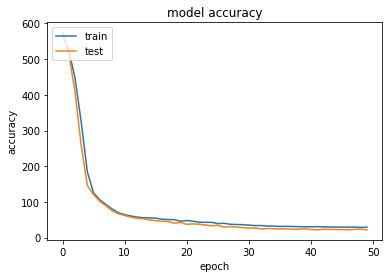

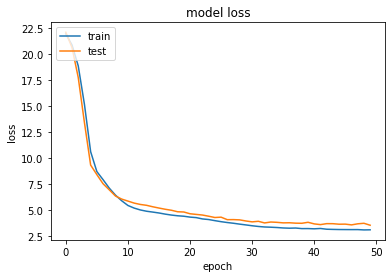

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Imports for baseline regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate linear regression model 
model = LinearRegression()

# Fit the model
model.fit(X_train_df, y_train)
y_pred = model.predict(X_train_df)
mse = mean_squared_error(y_train, y_pred)
print("Train error:", mse)

# Also apply model to test data
y_pred = model.predict(X_test_df)
mse = mean_squared_error(y_test, y_pred)
print("Test error:", mse)

Train error: 35.525159115342426
Test error: 25.66732751707087


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

---
* Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
---

In [13]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


---
* Make sure to one-hot encode your category labels
---

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical 

# Normalize data dimensions so that they are approximately the same scale
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.

one_hot_y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
one_hot_y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

print(one_hot_y_train.shape)
print(one_hot_y_test.shape)

(60000, 10)
(10000, 10)


---
* The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
* Try different hyperparameters. What is the highest accuracy that you are able to achieve.
---

In [23]:
# Instantiate history for callback/visualizations
history3 = History()

# Instantiate model and add layers
model = Sequential()
model.add(Flatten())
model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and report MSE
model.fit(x=X_train, 
        y=one_hot_y_train, 
        epochs=50, 
        validation_data=(X_test, one_hot_y_test), 
        callbacks=[history3])

Epoch 1/50
1875/1875 [==============================] - 2s 995us/step - loss: 0.4882 - accuracy: 0.8255 - val_loss: 0.4005 - val_accuracy: 0.8566
Epoch 2/50
1875/1875 [==============================] - 2s 920us/step - loss: 0.3670 - accuracy: 0.8648 - val_loss: 0.3770 - val_accuracy: 0.8678
Epoch 3/50
1875/1875 [==============================] - 2s 943us/step - loss: 0.3338 - accuracy: 0.8761 - val_loss: 0.3790 - val_accuracy: 0.8622
Epoch 4/50
1875/1875 [==============================] - 2s 928us/step - loss: 0.3073 - accuracy: 0.8862 - val_loss: 0.3471 - val_accuracy: 0.8720
Epoch 5/50
1875/1875 [==============================] - 2s 903us/step - loss: 0.2902 - accuracy: 0.8913 - val_loss: 0.3652 - val_accuracy: 0.8687
Epoch 6/50
1875/1875 [==============================] - 2s 893us/step - loss: 0.2764 - accuracy: 0.8964 - val_loss: 0.3477 - val_accuracy: 0.8771
Epoch 7/50
1875/1875 [==============================] - 2s 895us/step - loss: 0.2630 - accuracy: 0.9012 - val_loss: 0.3692 -

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.